# Лабораторна робота #2
# Студента групи МІТ-31 
# З дисципліни Інтелектуальний аналіз даних
# Невмержицький Олександр

In [209]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression

#Завдання 1

In [210]:
X, y = make_regression(n_samples=256, n_features=5, n_informative=256, n_targets=1,  noise=0.0, shuffle=True, coef=False, random_state=None)

print(X,y)

[[-0.02883203 -0.37781939  1.77781316 -1.40664069 -1.57879791]
 [ 0.10546139 -0.67454508 -1.58034491 -0.22250392  0.80759947]
 [-2.39081902 -0.05224918 -1.87998887 -0.95080188  0.97098429]
 ...
 [ 0.07782291  0.39518475 -2.45647076 -0.2441592   0.14833352]
 [ 0.26115795 -0.13094617 -1.17696964 -0.65930017  0.08753631]
 [ 2.23963749  0.08031601 -1.18146274  1.85045288  1.03148548]] [-6.49694940e+01 -5.17073632e+01 -1.28138926e+02  2.03128240e+02
  2.39823946e+01 -3.79917730e+01 -4.68428178e+01 -9.85781858e+01
  6.35820808e+01 -3.19169389e+01 -1.50843983e+02 -4.89630057e+01
 -2.27081977e+02 -1.11002266e+02  2.37150253e+02  1.42931006e+01
  5.80722142e+01 -3.54056591e+02  2.57140461e+01 -7.97872269e+01
 -1.68042189e+02  1.38400182e+02  1.34746178e+01  3.52580763e+01
 -5.84627241e+01  7.88267901e+01  2.28655659e+02 -4.22396446e+01
 -2.89264230e+00 -1.27275539e+02 -1.26694138e+01 -5.78090726e+01
 -8.17788411e+01  1.33429320e+02 -3.76776642e+01 -2.64524285e-01
 -5.21328405e+01 -2.14701886e+0

In [211]:
df = pd.DataFrame(X, y)
df.to_csv('sklearn_data_set.csv')
df.head()

,0,1,2,3,4
-64.969494,-0.028832,-0.377819,1.777813,-1.406641,-1.578798
-51.707363,0.105461,-0.674545,-1.580345,-0.222504,0.807599
-128.138926,-2.390819,-0.052249,-1.879989,-0.950802,0.970984
203.128240,0.212476,-0.303279,1.341613,0.950521,1.124253
23.982395,0.974481,0.225517,0.792656,-0.277882,-0.458307


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 256 entries, -64.96949395577599 to 117.97149863173198
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       256 non-null    float64
 1   1       256 non-null    float64
 2   2       256 non-null    float64
 3   3       256 non-null    float64
 4   4       256 non-null    float64
dtypes: float64(5)
memory usage: 12.0 KB


In [213]:
df.describe()

,0,1,2,3,4
count,256.000000,256.000000,256.000000,256.000000,256.000000
mean,-0.102623,-0.016237,-0.038124,0.008447,0.067906
std,1.044983,1.024783,1.033644,0.949707,1.010448
min,-3.497304,-3.256540,-2.456471,-2.368712,-3.167358
25%,-0.792858,-0.653679,-0.724689,-0.648946,-0.628927
50%,-0.162973,-0.015557,-0.096386,-0.042050,0.166436
75%,0.608094,0.620418,0.652694,0.576157,0.709435
max,2.758738,2.890364,2.778495,2.803109,2.918085


<AxesSubplot:>

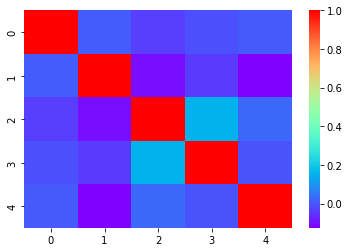

In [214]:
corr = df.corr()
sns.heatmap(corr, cmap="rainbow")

#Завдання 2

In [215]:
df = pd.read_csv('train.csv')
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [217]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


<AxesSubplot:>

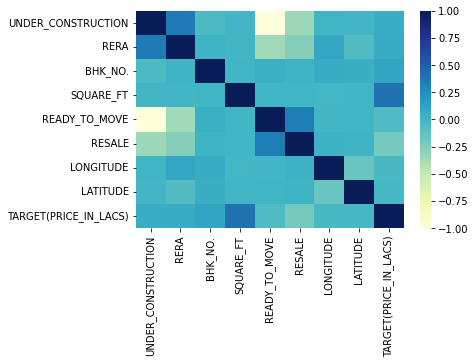

In [218]:
corr = df.corr()
sns.heatmap(corr, cmap="YlGnBu")

In [219]:
import sklearn
from sklearn.model_selection import train_test_split

In [220]:
columns=df.columns #label не використовую, він не типу int або float
columns=columns[:19]
X=df[['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'LONGITUDE', 'LATITUDE']]

y=df[['SQUARE_FT']]

In [221]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [222]:
from sklearn.linear_model import LinearRegression

In [223]:
lr = LinearRegression()

In [224]:
lr.fit(X_train,y_train)


LinearRegression()

In [225]:
y_Hat = lr.predict(X_test)

In [226]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_Hat)


5.007867669163201e-10

In [227]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test, y_Hat)

6.338027620301535e-16

In [228]:
res = pd.DataFrame(y_test)
res['SQUARE_FT_p'] = y_Hat

res.head()

,SQUARE_FT,SQUARE_FT_p
13734,1350.621286,1350.621286
3050,1159.745604,1159.745604
27827,1619.937695,1619.937695
2645,1166.407465,1166.407465
12806,1750.000000,1750.000000


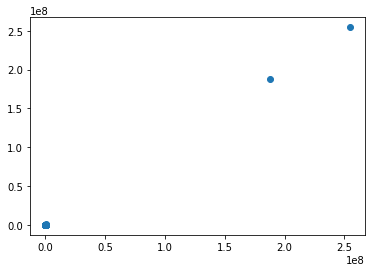

In [229]:
plt.scatter(res['SQUARE_FT'],res['SQUARE_FT_p'])

#Завдання 3

In [230]:
import random as rnd

OC_param = {0:'Windows', 1:'Mac'}
time = {0:'<120', 1:'>120'}
legal = {0:'legal', 1:'illegal'}
supported = {0:'YES', 1:'NO'}
copies = {0:'0', 1:'1', 2:'2', 3:'More than 3'}
location = {0:'Ukrainian', 1:'Poland', 2:'Germany', 3:'America'}
data = []
for i in range(0, 512):
    row = []
    row.append(round(rnd.uniform(1, 50), 2))
    row.append(round(rnd.uniform(1, 10), 2))
    row.append(OC_param[rnd.randint(0, 1)])
    row.append(time[rnd.randint(0, 1)])
    row.append(legal[rnd.randint(0, 1)])
    row.append(supported[rnd.randint(0, 1)])
    row.append(copies[rnd.randint(0, 3)])
    row.append(location[rnd.randint(0, 3)])
    data.append(row)
df = pd.DataFrame(data, columns=['total_utility_bill', 'commission', 'OC_param', 'time', 'legal', 'supported', 'copies', 'location'])

In [231]:
df.replace({'Windows': 0, 'Mac':1, '<120': 0, '>120':1, 'legal':0, 'illegal':1, 'YES':0, 'NO':1, '0':0, '1':1, '2':2, 'More than 3':3, 'Ukrainian': 0
, 'Poland':1, 'Germany':2, 'America':3}, None, True)

df.to_csv('my_data_set.csv')

In [232]:
df.head()

,total_utility_bill,commission,OC_param,time,legal,supported,copies,location
0,41.22,2.28,0,0,1,0,3,3
1,22.91,3.45,0,1,0,1,0,3
2,18.50,6.14,0,1,1,1,2,0
3,1.83,1.54,0,1,0,0,2,0
4,33.78,5.50,0,0,0,0,3,3


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_utility_bill  512 non-null    float64
 1   commission          512 non-null    float64
 2   OC_param            512 non-null    int64  
 3   time                512 non-null    int64  
 4   legal               512 non-null    int64  
 5   supported           512 non-null    int64  
 6   copies              512 non-null    int64  
 7   location            512 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 32.1 KB


In [234]:
df.describe()

,total_utility_bill,commission,OC_param,time,legal,supported,copies,location
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,25.238652,5.722012,0.498047,0.546875,0.494141,0.484375,1.564453,1.468750
std,14.106883,2.539801,0.500485,0.498285,0.500455,0.500245,1.131192,1.132598
min,1.020000,1.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.625000,3.637500,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,25.215000,5.695000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
75%,36.440000,7.955000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000
max,49.960000,9.980000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000


<AxesSubplot:>

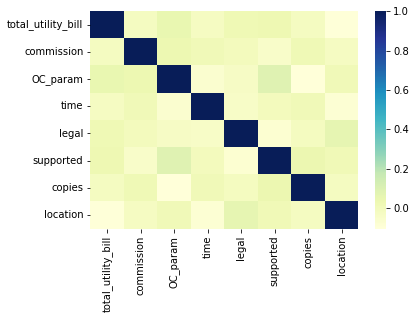

In [235]:
corr = df.corr()
sns.heatmap(corr, cmap="YlGnBu")

In [236]:
columns=df.columns
columns=columns[:7]
X=df[['total_utility_bill', 'commission', 'OC_param', 'time', 'legal', 'supported', 'copies']]

y=df[['location']]

In [237]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [238]:
lr = LinearRegression()

In [239]:
lr.fit(X_train,y_train)

LinearRegression()

In [240]:
y_Hat = lr.predict(X_test)

In [241]:
mean_absolute_error(y_test, y_Hat)

0.9591126303662675

In [242]:
mean_squared_error(y_test, y_Hat)

1.214491373679543

In [243]:
res = pd.DataFrame(y_test)
res['location_predicted'] = y_Hat

res.head()

,location,location_predicted
153,1,1.414213
316,3,1.681712
17,0,1.513187
273,3,1.550901
369,0,1.208788


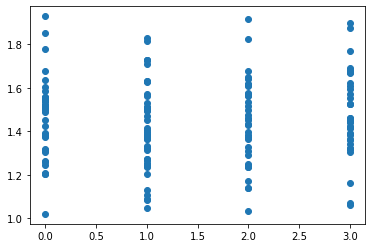

In [244]:
plt.scatter(res['location'],res['location_predicted'])